# Lets Predict the stock Prices for NVIDIA !

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end='2022-12-21'
stock='NVDA'

data=yf.download(stock , start , end)

[*********************100%%**********************]  1 of 1 completed


Extracting the data & downloading the data

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,0.357500,0.360000,0.350250,0.351000,0.321947,468044000
2012-01-04,0.351250,0.356500,0.348000,0.355000,0.325616,347372000
2012-01-05,0.353250,0.369500,0.351750,0.367750,0.337310,563548000
2012-01-06,0.367500,0.367750,0.359250,0.363500,0.333412,533252000
2012-01-09,0.363750,0.370500,0.361000,0.363500,0.333412,508244000
...,...,...,...,...,...,...
2022-12-14,17.987000,18.252001,17.420000,17.674000,17.663881,496888000
2022-12-15,17.146000,17.320000,16.700001,16.952000,16.942295,478542000
2022-12-16,16.864000,17.041000,16.410000,16.570999,16.561514,478232000


In [5]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
ma_100_days=data.Close.rolling(100).mean()

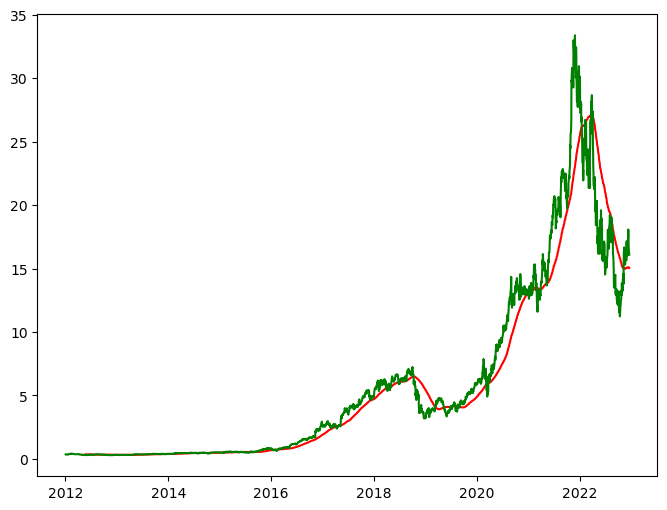

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days , 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days=data.Close.rolling(200).mean()

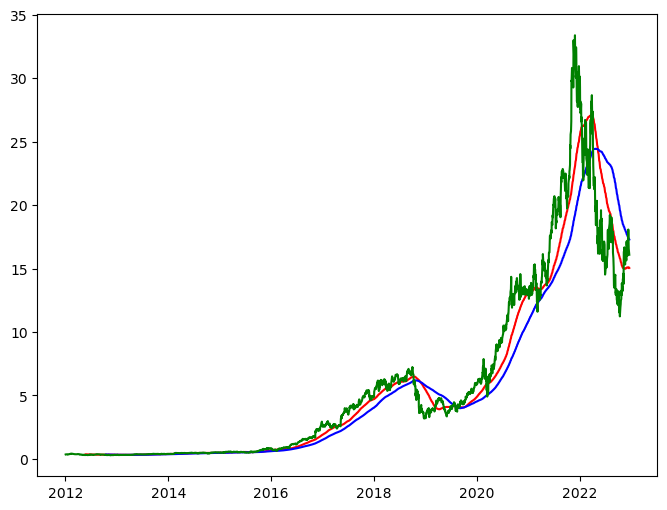

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days , 'r')
plt.plot(ma_200_days , 'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data.dropna(inplace=True)

# Train & Test Data Collection

In [11]:
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

Here , for training data- starting point "0" to 80% of closing data

for testing data- starting point is 80% of data to remaining data

In [12]:
data_train.shape      #80% of data

(2208, 1)

In [13]:
data_test.shape       #20% of data

(553, 1)

# Conversion of data into 0 & 1 format

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler(feature_range=(0, 1))

In [16]:
data_train_scale=scaler.fit_transform(data_train)

In [17]:
data_train_scale.shape[0]

2208

In [18]:
x=[]
y=[] 

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

So here , the array slicing has happened

has taken first 100 data, to calculate the next wanted data by the logic

In [19]:
x,y=np.array(x), np.array(y)

# Create Model

In [20]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [21]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1],1)) ))
model.add(Dropout(0.2)) #for avoiding the overfitting

model.add(LSTM(units=60, activation='relu', return_sequences=True ))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True ))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) #units =1 because we are predicting one value only


C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam' , loss='mean_squared_error')

In [23]:
model.fit(x,y,epochs=50,batch_size=32, verbose=1 ) #verbose - for printing 

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - loss: 0.0324
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - loss: 0.0032
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - loss: 0.0030
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - loss: 0.0030
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - loss: 0.0027
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - loss: 0.0023
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - loss: 0.0022
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - loss: 0.0023
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - loss: 0.0026
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - loss: 0.0025
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - loss: 0.0021
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0024
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0020
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0019
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days=data_train.tail(100)

In [26]:
data_test=pd.concat([pas_100_days, data_test], ignore_index=True)

In [27]:
data_test

,Close
0,8.970000
1,8.775250
2,9.026250
3,8.717750
4,8.525250
...,...
648,17.674000
649,16.952000
650,16.570999
651,16.254000


100 rows of train data got added

In [28]:
data_test_scale= scaler.fit_transform(data_test)

In [29]:
x=[]
y=[] 

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [30]:
x,y=np.array(x), np.array(y)

In [31]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step


In [32]:
#array_3d=np.array(y_predict)

In [33]:
#array_2d=array_3d.reshape(-1, array_3d.shape[2])

In [34]:
#array_2d

In [35]:
y_predict

array([[0.18087035],
       [0.18350846],
       [0.1867508 ],
       [0.19054341],
       [0.1947206 ],
       [0.19901466],
       [0.20311478],
       [0.20673628],
       [0.20968962],
       [0.21187505],
       [0.21329805],
       [0.21394941],
       [0.21390143],
       [0.21314958],
       [0.21177715],
       [0.2098692 ],
       [0.20753   ],
       [0.20489207],
       [0.20218149],
       [0.19973367],
       [0.19796407],
       [0.19695629],
       [0.19647612],
       [0.19633323],
       [0.19638626],
       [0.1965062 ],
       [0.19663867],
       [0.19674748],
       [0.1968149 ],
       [0.19683784],
       [0.19676276],
       [0.19654584],
       [0.19613886],
       [0.19555342],
       [0.19483286],
       [0.19405541],
       [0.19329625],
       [0.1926434 ],
       [0.19213718],
       [0.19181895],
       [0.19172345],
       [0.19181377],
       [0.1919615 ],
       [0.19204158],
       [0.19197407],
       [0.19175798],
       [0.19144025],
       [0.191

In [36]:
scaler.scale_

array([0.04017839])

In [37]:
scale=1/scaler.scale_

In [38]:
scale

array([24.88899899])

In [39]:
y_predict=y_predict*scale         #predicted values 

In [40]:
y=y*scale                         #actual values

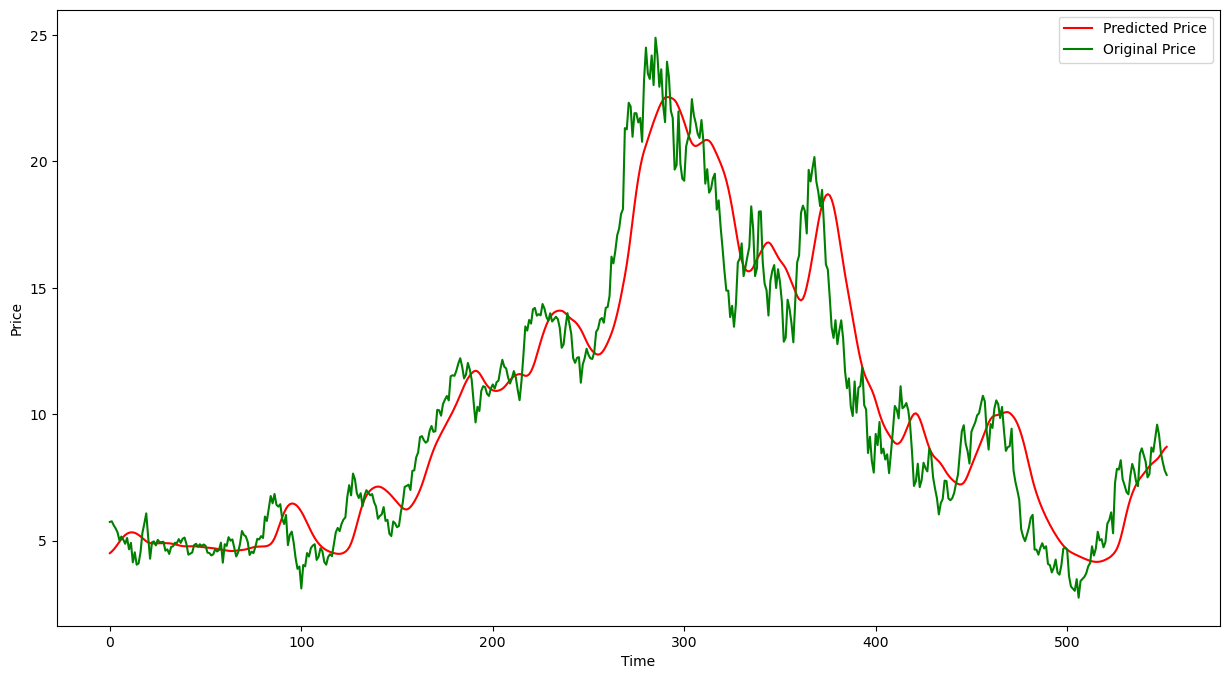

In [41]:
plt.figure(figsize=(15,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y,'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend() 
plt.show()

Kinda good predicted price!

In [42]:
model.save('Stock Predictions Model.keras')